Hierarchical Clustering

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
import scipy.cluster.hierarchy as sc

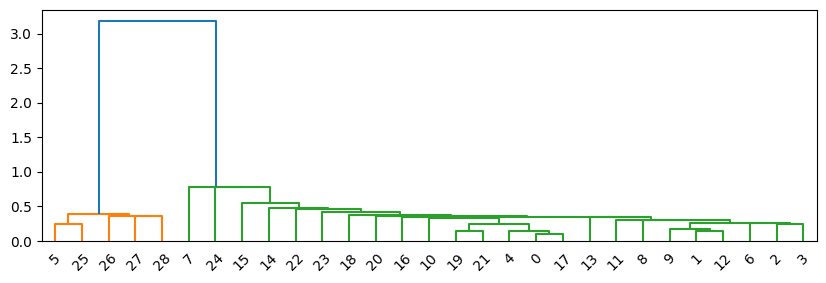

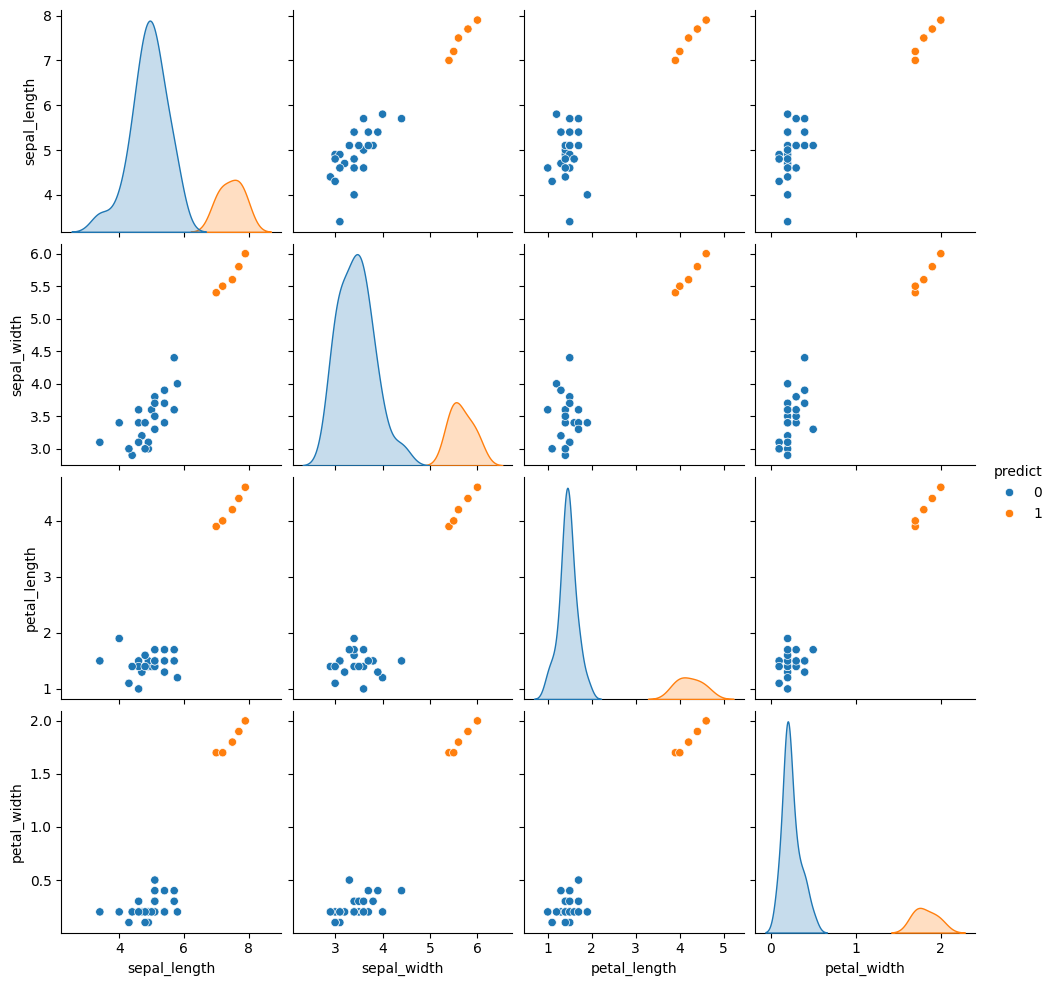

In [2]:
data=pd.read_csv(r"C:\python\ml\datasets\iris.csv")
data=data.drop(columns="species")
# sns.pairplot(data=data)
# plt.show()
plt.figure(figsize=(10,3))
sc.dendrogram(sc.linkage(data,method="single",metric='euclidean'))
plt.show()
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=2,linkage='single')
data["predict"]=ac.fit_predict(data)
sns.pairplot(data=data,hue="predict")
plt.show()

DBSCAN Clustering

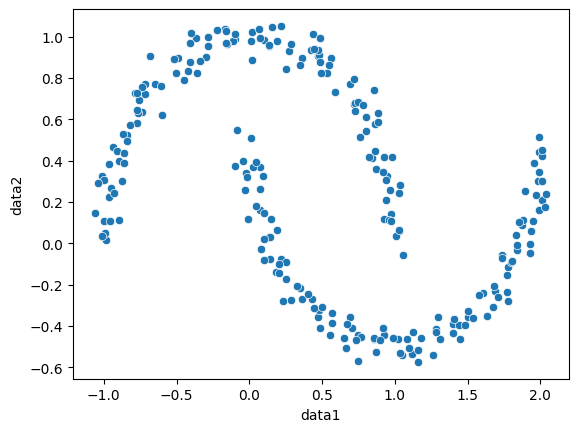

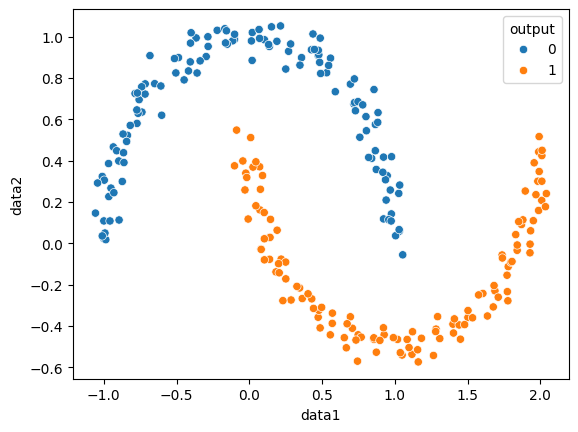

In [3]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=250,noise=0.05)
df={"data1":x[:,0],"data2":x[:,1],"output":y}
data=pd.DataFrame(df)
sns.scatterplot(x="data1",y="data2",data=data)
plt.show()
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.2,min_samples=3)
data["predict"]=db.fit_predict(data)
sns.scatterplot(x="data1",y="data2",data=data,hue="output")
plt.show()

Association Learning
1) Apriori Algorithm

In [4]:
mar=[]
data=pd.read_csv(r"C:\python\ml\datasets\grocieries.csv")
for i in range(0,data.shape[0]):
    cus=[]
    for j in data.columns:
        if type(data.iloc[i][j])==str:
            cus.append(data.iloc[i][j])
    mar.append(cus)
import collections
l=[]
for i in mar:
    for j in i:
        l.append(j)
p=collections.Counter(l)
d={"item name":p.keys(),"values":p.values()}
# pd.DataFrame(d).sort_values(by=["values"],ascending=False)

from mlxtend.preprocessing.transactionencoder import TransactionEncoder
tr=TransactionEncoder()
tr.fit(mar)
df=pd.DataFrame(tr.transform(mar),columns=tr.columns_)

from mlxtend.frequent_patterns import apriori
apriori(df,min_support=0.05,use_colnames=True,max_len=3).sort_values(by=["support"])


,support,itemsets
49,0.066667,"(diapers, beer, apples)"
54,0.066667,"(butter, apples, cheese)"
53,0.066667,"(bread, apples, milk)"
52,0.066667,"(bread, eggs, apples)"
58,0.066667,"(coke, apples, milk)"
...,...,...
7,0.400000,(diapers)
8,0.400000,(eggs)
4,0.433333,(cheese)
9,0.533333,(milk)


Frequency Growth Algo

In [5]:
from mlxtend.frequent_patterns import fpgrowth
fpgrowth(df,min_support=0.07,use_colnames=True,max_len=3).sort_values(by=["support"])

,support,itemsets
37,0.100000,"(beer, eggs, bread)"
34,0.100000,"(beer, cheese)"
35,0.100000,"(diapers, beer, bread)"
36,0.100000,"(beer, bread, milk)"
73,0.100000,"(chips, bread, milk)"
...,...,...
4,0.400000,(diapers)
2,0.400000,(eggs)
8,0.433333,(cheese)
1,0.533333,(milk)


MAX voting and average voting

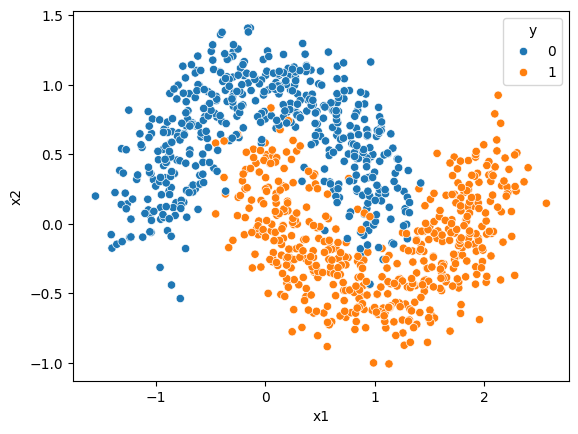

In [6]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=1000,noise=0.2)
df={"x1":x[:,0],"x2":x[:,1],"y":y}
data=pd.DataFrame(df)
data
sns.scatterplot(x="x1",y="x2",data=data,hue="y")
plt.show()

In [7]:
x_a=data.iloc[:,:-1]
y_a=data["y"]

from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(x_a,y_a,train_size=0.2,random_state=42)

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100 , sv.score(x_test,y_test)*100

gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100 , gnb.score(x_test,y_test)*100

from sklearn.ensemble import VotingClassifier

li=[("dt1",DecisionTreeClassifier()),("sv1",SVC()),("gnb1",GaussianNB())]
vc=VotingClassifier(li,weights=[10,4,7])
vc.fit(x_train,y_train)
vc.score(x_train,y_train)*100 , vc.score(x_test,y_test)*100

prd={"dt":dt.predict(x_test),"sv":sv.predict(x_test),"gnb":gnb.predict(x_test)}
pd.DataFrame(prd)


,dt,sv,gnb
0,0,0,0
1,1,1,1
2,0,0,0
3,1,1,1
4,1,1,1
...,...,...,...
795,1,1,1
796,1,1,1
797,1,1,0
798,0,0,0


In [8]:
data=pd.read_csv(r"C:\python\ml\datasets\cgpa.csv")
x=data.iloc[:,:-1]
y=data["package"]

from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR


lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100 , lr.score(x_test,y_test)*100


dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100 , dt.score(x_test,y_test)*100

sv=SVR()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100 , sv.score(x_test,y_test)*100

from sklearn.ensemble import VotingRegressor

li=[("dt1",DecisionTreeRegressor()),("sv1",SVR()),("lr1",LinearRegression())]
vc=VotingRegressor(li,weights=[10,4,7])
vc.fit(x_train,y_train)
vc.score(x_train,y_train)*100 , vc.score(x_test,y_test)*100

prd={"dt":dt.predict(x_test),"sv":sv.predict(x_test),"lr":lr.predict(x_test),"vc":vc.predict(x_test)}
pd.DataFrame(prd)
# (2.60+2.884552+2.935135)/3


,dt,sv,lr,vc
0,2.60,2.884552,2.935135,2.765912
1,2.31,2.903802,2.223827,2.394381


Bagging estimator and random forest

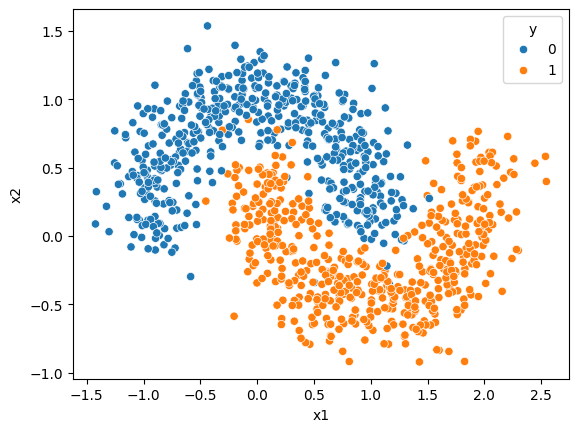

(99.5, 98.0)

In [9]:
from sklearn.datasets import make_moons
x,y=make_moons(n_samples=1000,noise=0.2)
df={"x1":x[:,0],"x2":x[:,1],"y":y}
data=pd.DataFrame(df)
data
sns.scatterplot(x="x1",y="x2",data=data,hue="y")
plt.show()

x_a=data.iloc[:,:-1]
y_a=data["y"]

from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(x_a,y_a,train_size=0.2,random_state=42)

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

bg=BaggingClassifier(estimator=SVC(),n_estimators=30)
bg.fit(x_train,y_train)
bg.score(x_train,y_train)*100,bg.score(x_test,y_test)*100

sv=SVC( )
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100


rf=RandomForestClassifier(n_estimators=30)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100



In [10]:
data=pd.read_csv(r"C:\python\ml\datasets\cgpa.csv")
x=data.iloc[:,:-1]
y=data["package"]

from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

bg=BaggingRegressor(estimator=LinearRegression(),n_estimators=30)
bg.fit(x_train,y_train)
bg.score(x_train,y_train)*100,bg.score(x_test,y_test)*100

lr=LinearRegression( )
lr.fit(x_train,y_train)
lr.score(x_train,y_train)*100,lr.score(x_test,y_test)*100


rf=RandomForestRegressor(n_estimators=30)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)*100,rf.score(x_test,y_test)*100

(83.61590709668552, -343.64097777777926)